# 버전 확인

In [1]:
import numpy

numpy.__version__

'1.26.4'

In [2]:
import pandas

pandas.__version__

'1.4.4'

In [3]:
import matplotlib

matplotlib.__version__

'3.5.2'

In [4]:
import folium

folium.__version__

'0.16.0'

In [5]:
import sklearn

sklearn.__version__

'1.0.2'

# 패키지 로딩

In [1]:
import numpy as np
import pandas as pd
import glob

import matplotlib.pyplot as plt
import folium

import warnings

warnings.filterwarnings("ignore")

plt.rcParams['font.family'] ='Malgun Gothic'

# 데이터 로딩
- 1월 27일 ~ 5월 17일, 111일치

## 2023년 따릉이 사용량 

In [2]:
df_2023 = pd.DataFrame()

for i in range(1, 6):

    all_files = glob.glob(f"./data/일일 따릉이 사용내역/23년/{i}월/*.csv")

    for file in all_files:
        
        try:
            temp = pd.read_csv(file, encoding="utf-8-sig")
            
        except:
            temp = pd.read_csv(file, encoding="cp949")

        try:
            temp = temp[["기준_날짜", "집계 기준", "기준_시간대", "정류소 ID"]]
            temp = temp[temp["집계 기준"] == "도착시간"]
            temp = temp.drop("집계 기준", axis = 1)
            
        except:
            temp = temp[["기준_날짜", "기준_시간대", "시작_대여소_ID"]]
            
        finally:
            temp["기준_날짜"] = pd.to_datetime(temp["기준_날짜"], format='%Y%m%d')

            df_2023 = pd.concat([df_2023, temp], axis = 0)
            
df_2023.sort_values(["기준_날짜", "기준_시간대"]).reset_index(drop=True, inplace = True)

df_2023

,기준_날짜,기준_시간대,시작_대여소_ID
0,2023-01-30,0,ST-3187
1,2023-01-30,0,ST-422
2,2023-01-30,0,ST-5
3,2023-01-30,0,ST-664
4,2023-01-30,0,ST-720
...,...,...,...
30693,2023-05-05,30,ST-513
30694,2023-05-05,50,ST-1420
30695,2023-05-05,505,ST-2771
30696,2023-05-05,640,ST-2045


## 2024년 따릉이 사용량
- 2월 4, 5, 6, 18, 19, 20일 데이터 X

In [3]:
df_2024 = pd.DataFrame()

for i in range(1, 6):

    all_files = glob.glob(f"./data/일일 따릉이 사용내역/24년/{i}월/*.csv")

    for file in all_files:
        
        try:
            temp = pd.read_csv(file, encoding="utf-8-sig")
            
        except:
            temp = pd.read_csv(file, encoding="cp949")

        try:
            temp = temp[["기준_날짜", "집계 기준", "기준_시간대", "정류소 ID"]]
            temp = temp[temp["집계 기준"] == "도착시간"]
            temp = temp.drop("집계 기준", axis = 1)
            
        except:
            temp = temp[["기준_날짜", "기준_시간대", "시작_대여소_ID"]]
            
        finally:
            temp["기준_날짜"] = pd.to_datetime(temp["기준_날짜"], format='%Y%m%d')

            df_2024 = pd.concat([df_2024, temp], axis = 0)
            
df_2024.sort_values(["기준_날짜", "기준_시간대"]).reset_index(drop=True, inplace = True)

df_2024

,기준_날짜,기준_시간대,시작_대여소_ID
0,2024-01-31,0,ST-1013
1,2024-01-31,0,ST-1014
2,2024-01-31,0,ST-1015
3,2024-01-31,0,ST-1046
4,2024-01-31,0,ST-1046
...,...,...,...
334602,2024-05-16,2355,ST-98
334603,2024-05-16,2355,ST-984
334604,2024-05-16,2355,ST-987
334605,2024-05-16,2355,ST-99


## 서울시 따릉이대여소 위치정보

In [113]:
sbike_spot = pd.read_csv("./data/서울시 따릉이대여소 마스터 정보.csv", encoding="cp949")

sbike_spot

,대여소_ID,주소1,주소2,위도,경도
0,ST-999,서울특별시 양천구 목동서로 280,목동아파트 8단지 상가동,0.000000,0.000000
1,ST-998,서울특별시 양천구 목동서로 130,목동아파트 4단지 상가동,0.000000,0.000000
2,ST-997,서울특별시 양천구 목동중앙로 49,목동3단지 시내버스정류장,37.534390,126.869598
3,ST-996,서울특별시 양천구 남부순환로88길5-16,양강중학교앞 교차로,37.524334,126.850548
4,ST-995,서울특별시 양천구 중앙로 153 공중화장실,NaN,37.510597,126.857323
...,...,...,...,...,...
3281,ST-1002,서울특별시 양천구 목동동로 316-6,서울시 도로환경관리센터,37.529900,126.876541
3282,ST-1001,서울특별시 양천구 남부순환로4길20,서서울호수공원,0.000000,0.000000
3283,ST-1000,서울특별시 양천구 신정동 236,서부식자재마트 건너편,37.510380,126.866798
3284,ST-100,서울특별시 광진구 아차산로 262,더샵스타시티 C동 앞,37.536667,127.073593


## 2023년 4월 주민등록인구

In [8]:
ppl_2023 = pd.read_csv("./data/인구 데이터/2023년_4월_주민등록인구.csv", encoding="cp949")

ppl_2023

,행정구역(시군구)별,연령별,총인구수 (명),남자인구수 (명),여자인구수 (명)
0,서울특별시,계,9422710,4563512,4859198
1,서울특별시,0세,39236,19977,19259
2,서울특별시,1세,43090,22212,20878
3,서울특별시,2세,43881,22424,21457
4,서울특별시,3세,46197,23982,22215
...,...,...,...,...,...
2647,강동구,96세,108,19,89
2648,강동구,97세,53,12,41
2649,강동구,98세,37,4,33
2650,강동구,99세,28,4,24


## 2024년 4월 주민등록인구

In [9]:
ppl_2024= pd.read_csv("./data/인구 데이터/2024년_4월_주민등록인구.csv", encoding="cp949")

ppl_2024

,행정구역(시군구)별,연령별,총인구수 (명),남자인구수 (명),여자인구수 (명)
0,서울특별시,계,9378269,4532115,4846154
1,서울특별시,0세,37255,19191,18064
2,서울특별시,1세,39761,20217,19544
3,서울특별시,2세,42137,21770,20367
4,서울특별시,3세,43140,22008,21132
...,...,...,...,...,...
2647,강동구,96세,92,16,76
2648,강동구,97세,81,11,70
2649,강동구,98세,42,7,35
2650,강동구,99세,23,2,21


# 데이터 전처리

## 2023년 따릉이 사용량

### 일별 사용량

In [12]:
daily_2023 = df_2023.groupby("기준_날짜")[["시작_대여소_ID"]].count()
daily_2023 = daily_2023.reset_index()
daily_2023 = daily_2023.rename(columns={"시작_대여소_ID":"2023년"})

In [13]:
daily_2023_plot = daily_2023.copy()
daily_2023_plot["기준_날짜"] = daily_2023_plot["기준_날짜"].apply(lambda x: x.replace(year = x.year + 1))

### 월별 사용량
- 2월 4, 5, 6, 18, 19, 20일 데이터 제거

In [14]:
daily_2023["월"] = daily_2023["기준_날짜"].dt.month.astype(str) + "월"

monthly_2023 = daily_2023.copy()
monthly_2023 = monthly_2023.drop([8, 9, 10, 22, 23, 24])

monthly_2023 = monthly_2023.groupby("월")[["2023년"]].sum()

## 2024년 따릉이 사용량

### 일별 사용량

In [15]:
daily_2024 = df_2024.groupby("기준_날짜")[["시작_대여소_ID"]].count()
daily_2024 = daily_2024.reset_index()
daily_2024 = daily_2024.rename(columns={"시작_대여소_ID":"2024년"})

### 월별 사용량

In [16]:
daily_2024["월"] = daily_2024["기준_날짜"].dt.month.astype(str) + "월"

monthly_2024 = daily_2024.groupby("월")[["2024년"]].sum()

## 2023 - 2024 따릉이 사용량 결합
- 2023: 24548453
- 2024: 23457496
- 1090957건 더 적음

In [17]:
sbike_monthly_total = pd.concat([monthly_2023, monthly_2024], axis = 1)
sbike_monthly_total["증감량"] = sbike_monthly_total["2024년"] - sbike_monthly_total["2023년"]

sbike_monthly_total["증감율"] = (sbike_monthly_total["2024년"] - sbike_monthly_total["2023년"])/sbike_monthly_total["2023년"] * 100

In [18]:
sbike_monthly_total

,2023년,2024년,증감량,증감율
월,,,,
1월,508445,721025,212580,41.809832
2월,3603695,3381011,-222684,-6.179324
3월,7463714,6082615,-1381099,-18.504179
4월,7769469,8739678,970209,12.487456
5월,5203130,4533167,-669963,-12.876153


In [19]:
temp = pd.DataFrame(sbike_monthly_total.sum()).T
temp.index = ["합계"]
temp["증감율"] = (temp["2024년"] - temp["2023년"])/temp["2023년"] * 100
temp

,2023년,2024년,증감량,증감율
합계,24548453.0,23457496.0,-1090957.0,-4.444097


## 서울시 따릉이대여소 위치정보

### 서울 -> 서울특별시

In [114]:
sbike_spot['주소1'] = sbike_spot['주소1'].str.replace('서울 ', '서울특별시 ')

### 도로명 주소 구 단위 주소 전처리

In [116]:
sbike_spot["주소1"].isna().sum()

0

In [117]:
import re

pattern = r"서울특별시\s(\w+구)"

sbike_spot['주소1'] = sbike_spot['주소1'].str.extract(pattern)

In [118]:
sbike_spot["주소1"].isna().sum()

3

In [130]:
na_check = sbike_spot[sbike_spot["주소1"].isna()]["대여소_ID"].values

sbike_spot = pd.read_csv("./data/서울시 따릉이대여소 마스터 정보.csv", encoding="cp949")

for i in na_check:
    display(na_df[na_df["대여소_ID"] == i])

,대여소_ID,주소1,주소2,위도,경도
857,ST-3191,경기도 하남시 학암동 652-1,NaN,37.484833,127.149918


,대여소_ID,주소1,주소2,위도,경도
858,ST-3190,경기도 하남시 학암동 651-1,위례솔,37.486931,127.153648


,대여소_ID,주소1,주소2,위도,경도
1707,ST-2426,경기 성남시 분당구 판교로 289,판교로,37.403549,127.10611


In [131]:
sbike_spot['주소1'] = sbike_spot['주소1'].str.replace('서울 ', '서울특별시 ')
sbike_spot['주소1'] = sbike_spot['주소1'].str.replace('경기 ', '경기도 ')

def extract_region(address):
    if re.search(r'서울특별시\s(\w+구)', address):
        return re.search(r'서울특별시\s(\w+구)', address).group(1)
    
    elif re.search(r'경기도', address):
        return '경기도'
    
    else:
        return address
    
sbike_spot['주소1'] = sbike_spot['주소1'].apply(extract_region)
sbike_spot = sbike_spot.drop("주소2", axis = 1)

### 구별 따릉이 대여소 대수 확인

In [141]:
sbike_count = sbike_spot.groupby("주소1")[["대여소_ID"]].count().sort_values("대여소_ID", ascending=False)

In [142]:
sbike_count

,대여소_ID
주소1,
송파구,249
강서구,224
강남구,193
영등포구,186
노원구,174
서초구,170
마포구,144
강동구,135
구로구,132


## 2023년 4월 주민등록인구

In [166]:
ppl_2023 = ppl_2023[ppl_2023["행정구역(시군구)별"] != "서울특별시"].reset_index(drop=True)
ppl_2023 = ppl_2023[ppl_2023["연령별"] != "계"].reset_index(drop=True)

In [175]:
pattern = r"(\d+)"

ppl_2023['연령별'] = ppl_2023['연령별'].str.extract(pattern).astype(int)

In [194]:
temp = ppl_2023[ppl_2023["행정구역(시군구)별"] == "종로구"]
temp = temp.drop("행정구역(시군구)별", axis = 1)

temp_df = pd.DataFrame()

for j in range(10):
    temp2 = temp.iloc[10 * j : 10 * j + 10].sum().to_frame()
    temp_df = pd.concat([temp_df, temp2], axis = 1)
    
temp_df = temp_df.drop("연령별")
temp_df.columns = ["10세 미만", "10대", "20대", "30대", "40대", "50대", "60대", "70대", "80대", "90대"]

In [196]:
temp

,연령별,총인구수 (명),남자인구수 (명),여자인구수 (명)
0,0,407,201,206
1,1,475,262,213
2,2,467,223,244
3,3,550,284,266
4,4,520,258,262
...,...,...,...,...
96,96,61,20,41
97,97,25,11,14
98,98,27,10,17
99,99,17,6,11


In [195]:
temp_df

,10세 미만,10대,20대,30대,40대,50대,60대,70대,80대,90대
총인구수 (명),6165,10094,21999,19313,19705,24043,20536,11461,6608,933
남자인구수 (명),3098,4986,10414,9643,9519,11937,10335,5168,2669,300
여자인구수 (명),3067,5108,11585,9670,10186,12106,10201,6293,3939,633


In [171]:
gu = ppl_2023["행정구역(시군구)별"].unique()

In [172]:
for i in gu:
    temp = ppl_2023[ppl_2023["행정구역(시군구)별"] == i]

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

# 데이터 시각화

## 일별 따릉이 사용량 비교

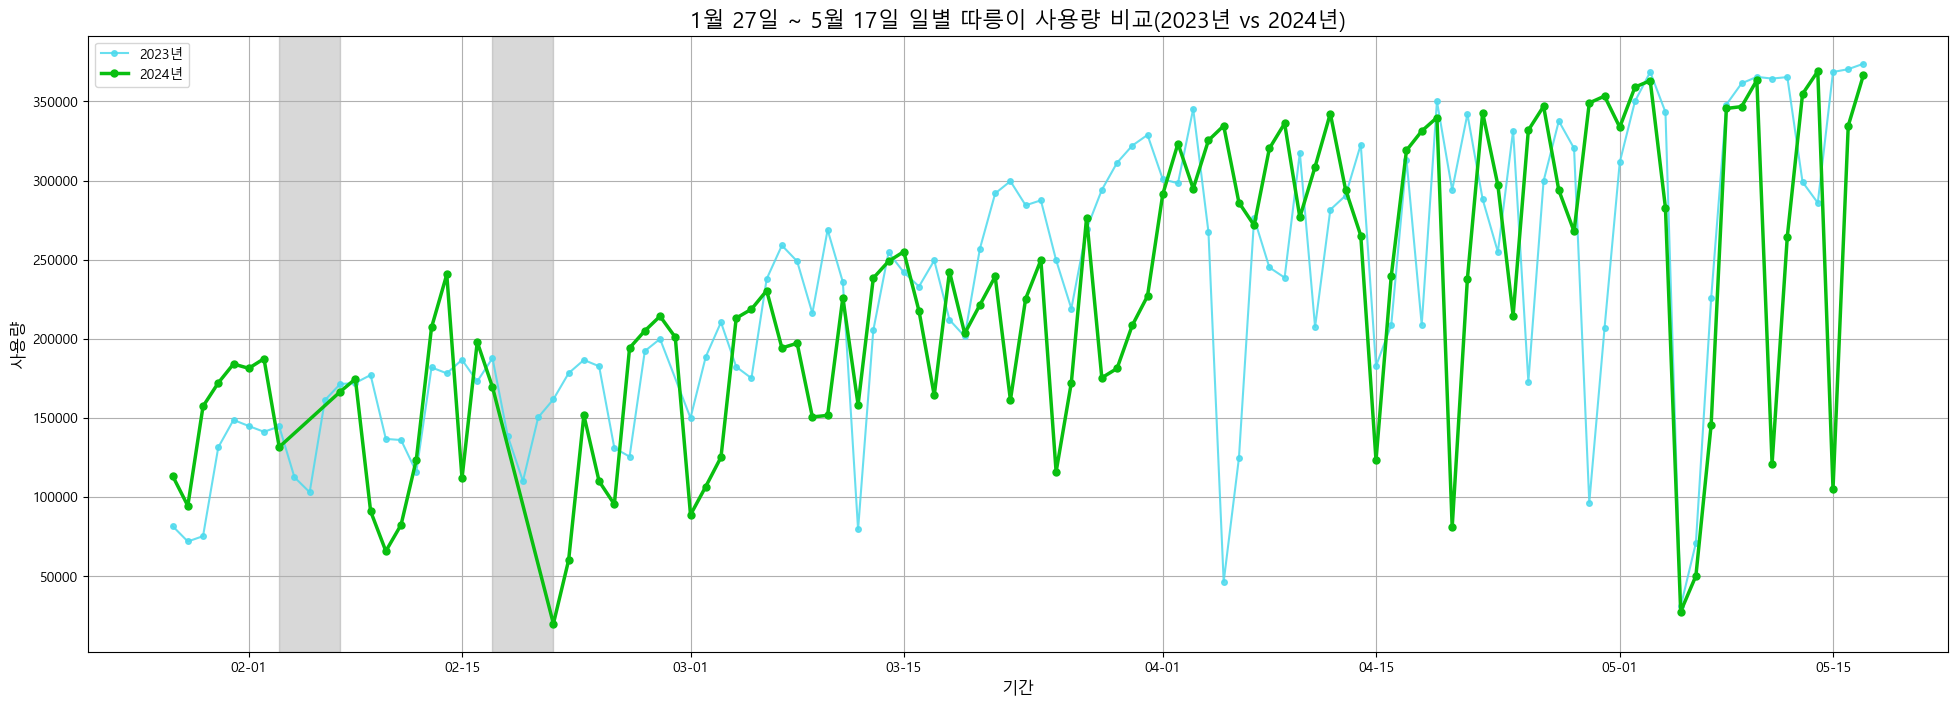

In [36]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(24, 8))

ax.plot(daily_2023_plot["기준_날짜"], daily_2023_plot["2023년"], label = "2023년", marker="o", markersize="4", color="#4EDAED", alpha=0.85)

ax.plot(daily_2024["기준_날짜"], daily_2024["2024년"], label = "2024년", marker="o", markersize="5", linewidth=2.5, color="#09bf10")

date_format = mdates.DateFormatter('%m-%d')
ax.xaxis.set_major_formatter(date_format)

ax.axvspan("2024-02-03", "2024-02-07", alpha=0.3, color='gray')
ax.axvspan("2024-02-17", "2024-02-21", alpha=0.3, color='gray')

plt.xlabel("기간", fontsize = 12)
plt.ylabel("사용량", fontsize = 12)
plt.title("1월 27일 ~ 5월 17일 일별 따릉이 사용량 비교(2023년 vs 2024년)", fontsize = 16)

plt.grid()
plt.legend()

plt.show()

## 월별 따릉이 사용량 비교

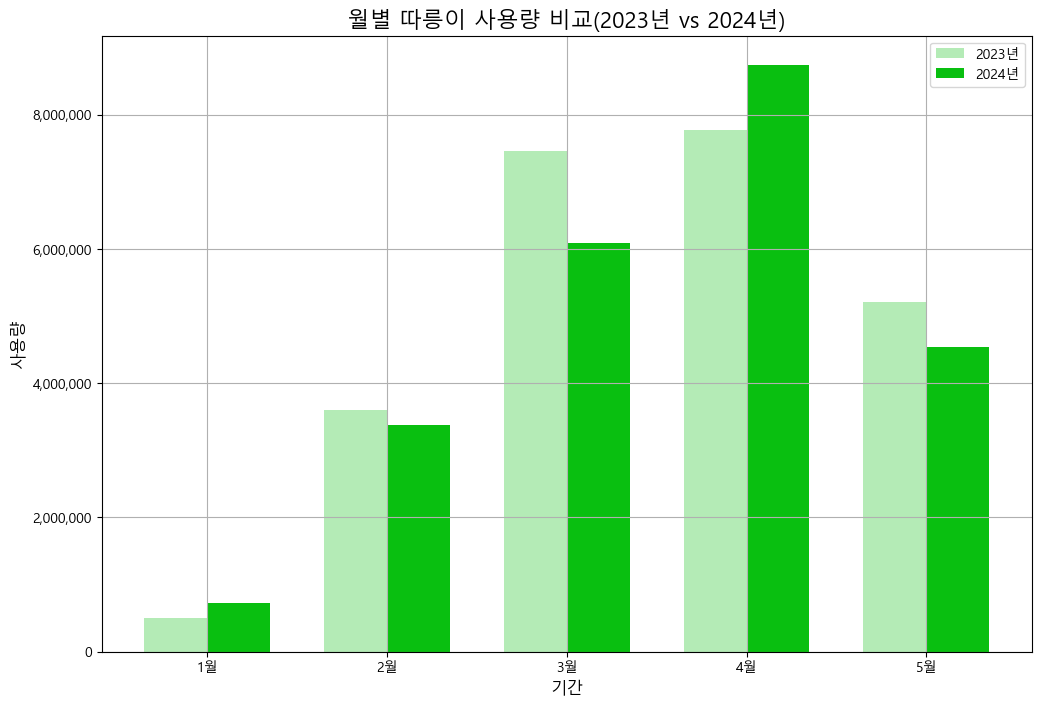

In [31]:
fig, ax = plt.subplots(figsize=(12, 8))

x_labels = ['1월', '2월', '3월', '4월', '5월']
x = np.arange(len(x_labels))

width = 0.35

ax.bar(x - width/2, monthly_2023["2023년"], width, label = "2023년", color="#09bf10", alpha=0.3)
ax.bar(x + width/2, monthly_2024["2024년"], width, label = "2024년", color="#09bf10")

ax.set_xticks(x)
ax.set_xticklabels(x_labels)

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.xlabel("기간", fontsize = 12)
plt.ylabel("사용량", fontsize = 12)
plt.title("월별 따릉이 사용량 비교(2023년 vs 2024년)", fontsize = 16)

plt.grid()
plt.legend()

plt.show()

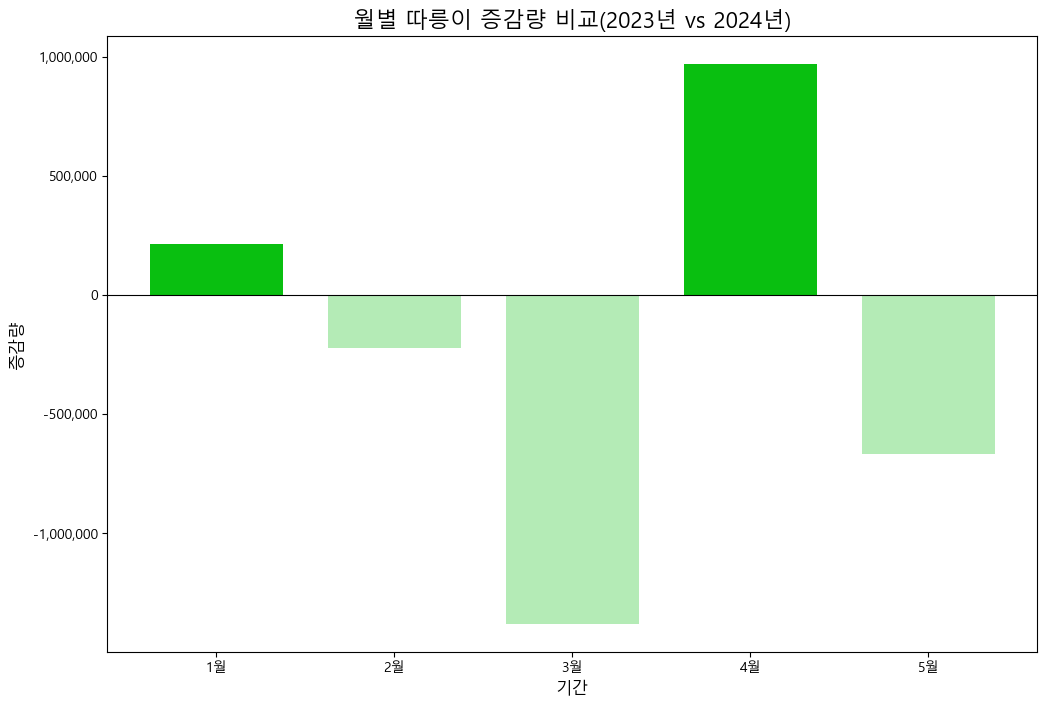

In [40]:
fig, ax = plt.subplots(figsize=(12, 8))

colors = ["#09bf10" if x > 0 else '#B4EBB6' for x in sbike_monthly_total["증감량"]]

plt.bar(sbike_monthly_total.index, sbike_monthly_total["증감량"], color=colors, width=0.75)

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

ax.axhline(y=0, color='black', linestyle='-', linewidth=0.8)

plt.xlabel("기간", fontsize = 12)
plt.ylabel("증감량", fontsize = 12)
plt.title("월별 따릉이 증감량 비교(2023년 vs 2024년)", fontsize = 16)

plt.show()

## 구별 따릉이 대여소 대수

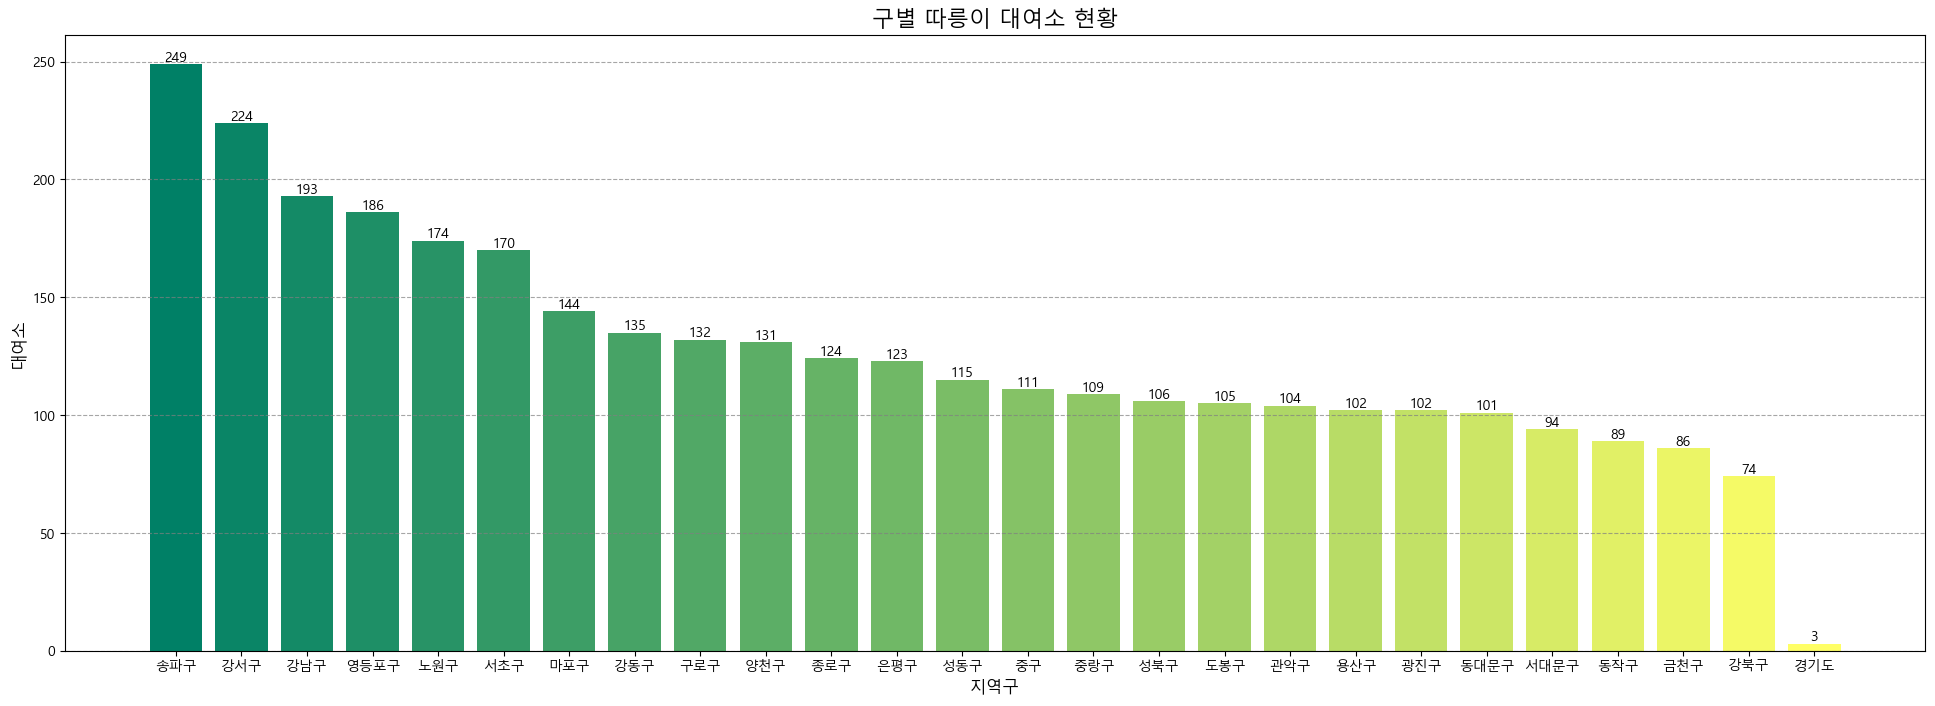

In [158]:
import matplotlib.cm as cm

colors = cm.summer(np.linspace(0, 1, len(sbike_count.index)))

fig, ax = plt.subplots(figsize=(24, 8))

bars = ax.bar(sbike_count.index, sbike_count["대여소_ID"], color=colors)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             str(height), ha='center', va='bottom')

plt.xlabel("지역구", fontsize = 12)
plt.ylabel("대여소", fontsize = 12)
plt.title("구별 따릉이 대여소 현황", fontsize = 16)

plt.grid(axis='y', linestyle='--', alpha=0.7, color="gray")

plt.show()